# Using btrack with napari


In [1]:
import os
import json

import btrack
import napari

import numpy as np
import pandas as pd

from skimage import io
from napari.utils import nbscreenshot

In [2]:
# objects = btrack.dataio.import_JSON('objects.json')
stack = io.imread('/media/quantumjot/DataIII/Data/Giulia/GV0800/Pos12/Pos12_aligned.tif')

In [3]:
with btrack.dataio.HDF5FileHandler('/home/quantumjot/Dropbox/Code/py3/arboretum/tracks.h5', 'r') as h:
    segmentation = h._hdf['segmentation']['images'][:]
    objects = h.objects
    
for obj in objects:
    obj.y, obj.x = obj.x, obj.y

[INFO][2020/10/08 10:57:46 AM] Opening HDF file: /home/quantumjot/Dropbox/Code/py3/arboretum/tracks.h5
[INFO][2020/10/08 10:57:50 AM] Loading obj_type_1 (377053, 5) (377053 filtered: None)...
[INFO][2020/10/08 10:57:54 AM] Closing HDF file: /home/quantumjot/Dropbox/Code/py3/arboretum/tracks.h5


In [4]:
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

  # configure the tracker using a config file
  tracker.configure_from_file('../models/cell_config.json')

  # append the objects to be tracked
  tracker.append(objects)

  # set the volume (Z axis volume is set very large for 2D data)
  tracker.volume=((0,1600), (0,1200), (-1e5,1e5))

  # track them (in interactive mode)
  tracker.track_interactive(step_size=100)

  # generate hypotheses and run the global optimizer
  tracker.optimize()

  # get the tracks in a format for napari visualization
  data, properties, graph = tracker.to_napari(ndim=2)

[INFO][2020/10/08 10:57:54 AM] Loaded btrack: /home/quantumjot/Dropbox/Code/py3/BayesianTracker/btrack/libs/libtracker.so
[INFO][2020/10/08 10:57:54 AM] btrack (v0.3.13) library imported
[INFO][2020/10/08 10:57:54 AM] Setting max XYZ search radius to: 100
[INFO][2020/10/08 10:57:54 AM] Starting BayesianTracker session
[INFO][2020/10/08 10:57:54 AM] Loading configuration file: ../models/cell_config.json
[INFO][2020/10/08 10:57:54 AM] Loading motion model: b'cell_motion'
[INFO][2020/10/08 10:57:54 AM] Objects are of type: <class 'list'>
[INFO][2020/10/08 10:57:55 AM] Set volume to ((0, 1600), (0, 1200), (-100000.0, 100000.0))
[INFO][2020/10/08 10:57:55 AM] Starting tracking... 
[INFO][2020/10/08 10:57:55 AM] Tracking objects in frames 0 to 99 (of 1194)...
[INFO][2020/10/08 10:57:55 AM]  - Timing (Bayesian updates: 1.06ms, Linking: 0.22ms)
[INFO][2020/10/08 10:57:55 AM]  - Probabilities (Link: 1.00000, Lost: 0.59648)
[INFO][2020/10/08 10:57:55 AM]  - Stats (Active: 77, Lost: 184, Conflict

In [5]:
vertices = data[:, 1:]

In [7]:
%gui qt
viewer = napari.Viewer()
viewer.add_image(stack)
viewer.add_points(vertices, size=4, name='points', opacity=0.3)
viewer.add_tracks(data, properties=properties, graph=graph, name='tracks')

<Tracks layer 'tracks' at 0x7f0f96efca90>

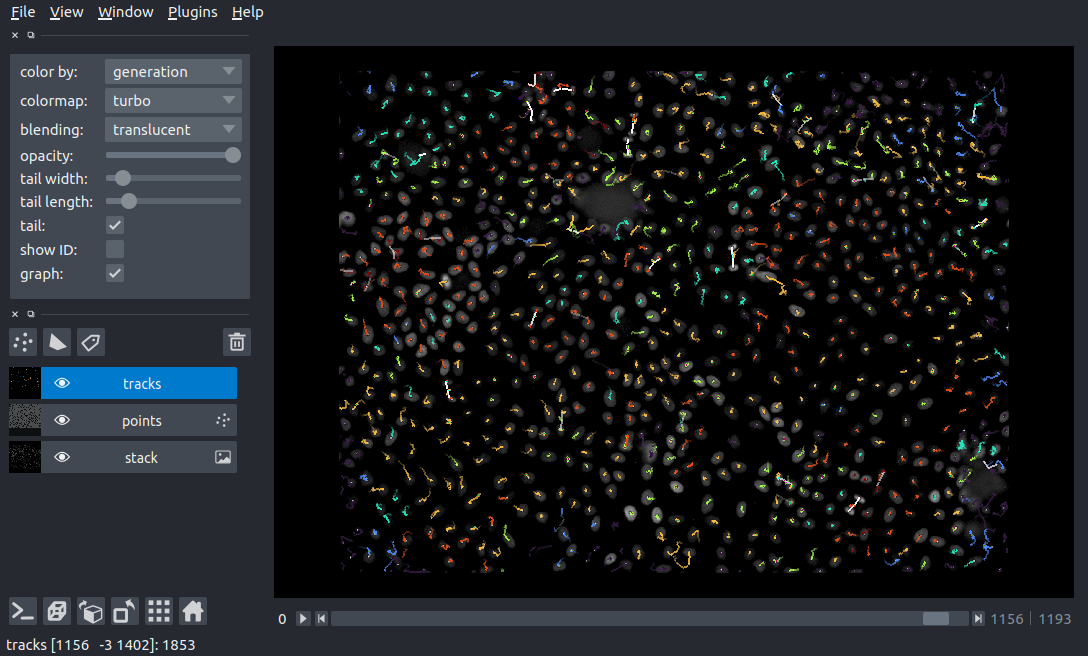

In [8]:
nbscreenshot(viewer)

### export data for Napari example

In [ ]:
# np.savetxt('example_track_data.csv', data, delimiter=",", fmt='%.2f')

# properties_df = pd.DataFrame(properties)
# properties_df.to_csv('example_track_properties.csv')

# with open('example_track_graph.txt', 'w') as file:
#     print(graph, file=file)